In [3]:
!pip install PyTDC[DDI]


  Using cached pytdc-1.1.14.tar.gz (151 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for accelerate==0.33.0 from https://files.pythonhosted.org/packages/15/33/b6b4ad5efa8b9f4275d4ed17ff8a44c97276171341ba565fdffb0e3dc5e8/accelerate-0.33.0-py3-none-any.whl.metadata
  Using cached accelerate-0.33.0-py3-none-any.whl.metadata (18 kB)
  Obtaining dependency information for dataclasses<1.0,>=0.6 from https://files.pythonhosted.org/packages/26/2f/1095cdc2868052dd1e64520f7c0d5c8c550ad297e944e641dbf1ffbb9a5d/dataclasses-0.6-py3-none-any.whl.metadata
  Using cached dataclasses-0.6-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for evaluate==0.4.2 from https://files.pythonhosted.org/packages/c2/d6/ff9baefc8fc679dcd9eb21b29da3ef10c81aa36be630a7ae78e4611588e1/evaluate-0.4.2-py3-none-any.whl.metadata
  Using cached evaluate-0.4.2-py3-none-any.whl.metadata (9.3 kB)
  Obtaining dependency information for fuzzywuzzy<1.0,>=0.18.0 from https://file

^C
ERROR: Operation cancelled by user


Training DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  332 non-null    float64
 1   Drug     332 non-null    object 
 2   Y        332 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.9+ KB
None

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  95 non-null     float64
 1   Drug     95 non-null     object 
 2   Y        95 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB
None

Validation DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  48 non-null     float64
 1   Drug

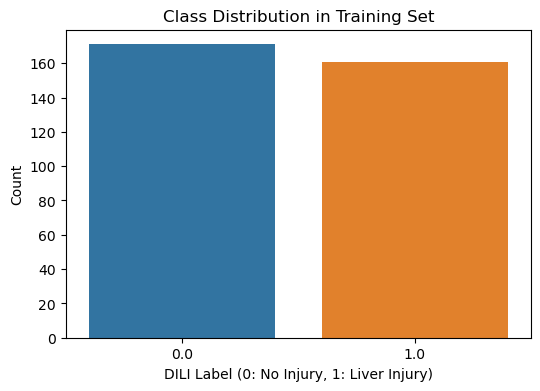


SMILES Length Statistics in Training DataFrame:
count    332.000000
mean      40.978916
std       21.206000
min       11.000000
25%       29.000000
50%       36.000000
75%       48.000000
max      168.000000
Name: SMILES_Length, dtype: float64


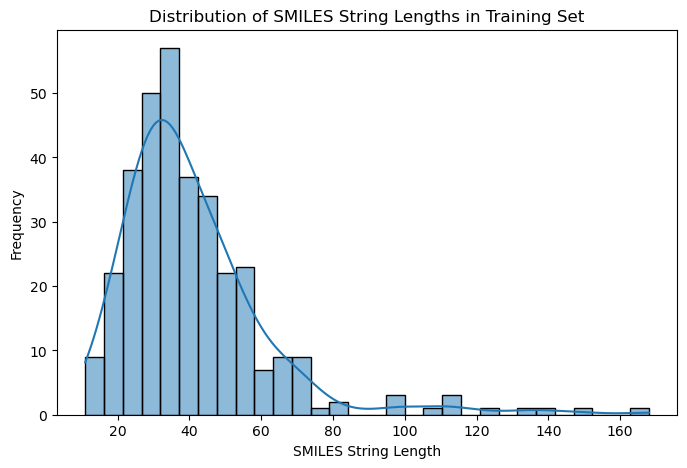

In [2]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to the dataset files in the data folder
data_dir = "../data"
train_file = os.path.join(data_dir, "dili_train.csv")
test_file = os.path.join(data_dir, "dili_test.csv")
valid_file = os.path.join(data_dir, "dili_valid.csv")
full_file = os.path.join(data_dir, "dili_full.csv")

# Load the datasets into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
valid_df = pd.read_csv(valid_file)
full_df = pd.read_csv(full_file)

# Display basic information about each DataFrame
print("Training DataFrame Info:")
print(train_df.info())
print("\nTest DataFrame Info:")
print(test_df.info())
print("\nValidation DataFrame Info:")
print(valid_df.info())
print("\nFull DataFrame Info:")
print(full_df.info())

# Display the first few rows of the training DataFrame
print("\nFirst 5 rows of the Training DataFrame:")
print(train_df.head())

# Check for missing values
print("\nMissing Values in Training DataFrame:")
print(train_df.isnull().sum())
print("\nMissing Values in Test DataFrame:")
print(test_df.isnull().sum())
print("\nMissing Values in Validation DataFrame:")
print(valid_df.isnull().sum())
print("\nMissing Values in Full DataFrame:")
print(full_df.isnull().sum())

# Check the distribution of the target variable in all sets
print("\nDistribution of Target Variable (Y) in Training DataFrame:")
print(train_df['Y'].value_counts(normalize=True))
print("\nDistribution of Target Variable (Y) in Test DataFrame:")
print(test_df['Y'].value_counts(normalize=True))
print("\nDistribution of Target Variable (Y) in Validation DataFrame:")
print(valid_df['Y'].value_counts(normalize=True))
print("\nDistribution of Target Variable (Y) in Full DataFrame:")
print(full_df['Y'].value_counts(normalize=True))

# Visualize the class distribution in the training set
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=train_df)
plt.title("Class Distribution in Training Set")
plt.xlabel("DILI Label (0: No Injury, 1: Liver Injury)")
plt.ylabel("Count")
plt.savefig(os.path.join(data_dir, "class_distribution_train.png"))
plt.show()

# Analyze SMILES string lengths (as a proxy for molecular complexity)
train_df['SMILES_Length'] = train_df['Drug'].apply(len)
print("\nSMILES Length Statistics in Training DataFrame:")
print(train_df['SMILES_Length'].describe())

# Visualize SMILES length distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['SMILES_Length'], bins=30, kde=True)
plt.title("Distribution of SMILES String Lengths in Training Set")
plt.xlabel("SMILES String Length")
plt.ylabel("Frequency")
plt.savefig(os.path.join(data_dir, "smiles_length_distribution_train.png"))
plt.show()